In [ ]:
# # Install cellpose
# # https://github.com/mouseland/cellpose
# # Anacondaプロンプトで
# conda create --name cellpose python=3.8
# conda activate cellpose
# python -m pip install cellpose[gui]
# # その他
# conda install jupyter
# conda install -c conda-forge matplotlib


In [4]:
# kernelをcellposeにする
# 開始しないときはコマンドプロンプトから仮想環境をactiveにする

In [ ]:
# https://cellpose.readthedocs.io/en/latest/notebook.html
import numpy as np
import matplotlib.pyplot as plt
from cellpose import models
from cellpose.io import imread

# model_type='cyto' or 'nuclei' or 'cyto2'
model = models.Cellpose(model_type='cyto')

# list of files
# PUT PATH TO YOUR FILES HERE!
files = ['./Temp/image2D.tif']

imgs = [imread(f) for f in files]
nimg = len(imgs)

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
channels = [[0,0]]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended)
# diameter can be a list or a single number for all images

# https://cellpose.readthedocs.io/en/latest/settings.html#
# Default parameters: 
# flow_threshold=0.4, 増やすと検出が増える
# cellprob_threshold=0.0, 減らすと検出が増える
# do_3D=False, 3Dの場合、flow_threshold は無効
# anisotropy, 3DのXYとZの比率
# stitch_threshold, Cellposeは各XYスライス上で2DのROIを作成し、
# 現在のスライス上のマスクと次のスライスとのIoUがstitch_threshold以上であればスライス間でステッチします。

masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=channels, flow_threshold=0.4)

In [21]:
# Segmentation
!cellpose --dir './Temp' --pretrained_model nuclei \
--save_tif --diameter 10 --flow_threshold 0 --save_each --verbose --in_folder --file


usage: cellpose [-h] [--use_gpu] [--gpu_device GPU_DEVICE] [--check_mkl]
                [--dir DIR] [--look_one_level_down] [--img_filter IMG_FILTER]
                [--channel_axis CHANNEL_AXIS] [--z_axis Z_AXIS] [--chan CHAN]
                [--chan2 CHAN2] [--invert] [--all_channels]
                [--pretrained_model PRETRAINED_MODEL] [--unet]
                [--nclasses NCLASSES] [--no_resample] [--net_avg]
                [--no_interp] [--no_norm] [--do_3D] [--diameter DIAMETER]
                [--stitch_threshold STITCH_THRESHOLD] [--fast_mode]
                [--flow_threshold FLOW_THRESHOLD]
                [--cellprob_threshold CELLPROB_THRESHOLD]
                [--anisotropy ANISOTROPY] [--exclude_on_edges] [--save_png]
                [--save_tif] [--no_npy] [--savedir SAVEDIR] [--dir_above]
                [--in_folders] [--save_flows] [--save_outlines]
                [--save_ncolor] [--save_txt] [--train] [--train_size]
                [--test_dir TEST_DIR] [--mask_fi

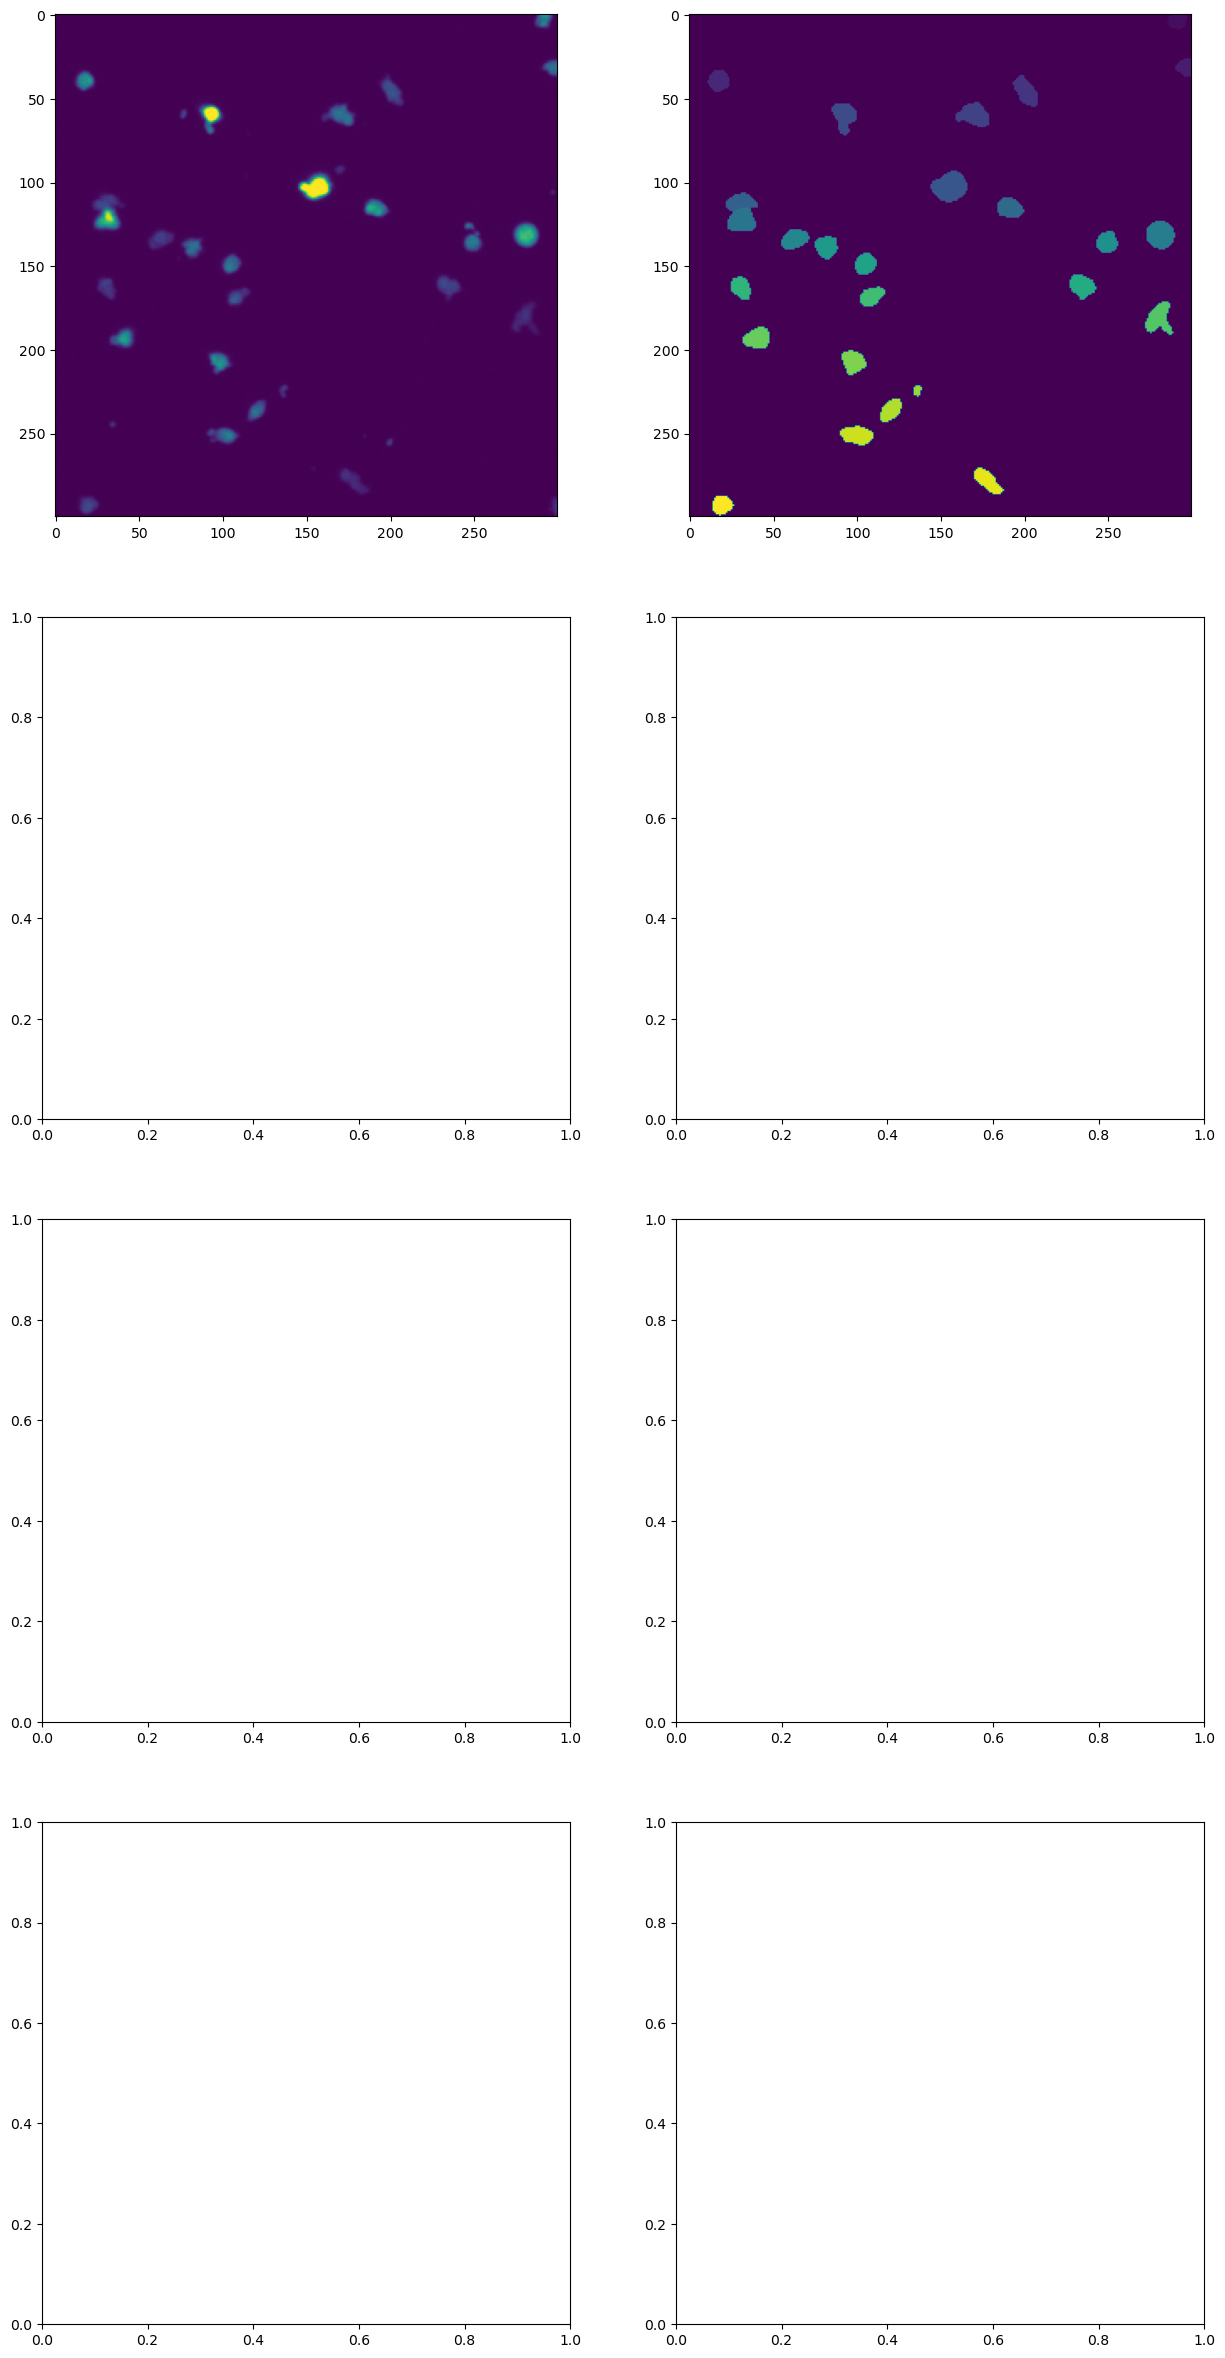

In [17]:
# 画像の表示
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 4, ncols=2, figsize=(15, 30))

if img.ndim==2:

    ax[0,0].imshow(img)
    ax[0,1].imshow(masks[0])
#     ax[1,0].imshow(bw)
#     ax[1,1].imshow(large)
#     ax[2,0].imshow(dist)
#     ax[2,1].imshow(wat)
#     ax[3,0].imshow(color_labels)
#     ax[3,1].imshow(lab)
    
else:
    z = 5
    ax[0,0].imshow(img[z])
    ax[0,1].imshow(dog[z])
    ax[1,0].imshow(bw[z])
    ax[1,1].imshow(large[z])
    ax[2,0].imshow(dist[z])
    ax[2,1].imshow(wat[z])
    ax[3,0].imshow(color_labels[z])
    ax[3,1].imshow(lab[z])
